## Preprocessing and Training Data Development

In this Notebook, I will make perform Proprocessing steps and prepare the training / testing data. 

The goal of the preprocessing work is to prepare the data for fitting models. 

The dataset include categorical features that will be transformed. 
I will also take a closer look at the summary statistics to examine the numeric data features, and determine the types of transformations. 
Additionally, in this notebook, I will also be performing standardizing the features' numeric magnitude and creating train and test splits.
The cleaned up and transformed dataset will saved modlling, as modelready_dataset_csv.


In [1]:
# Import Packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ipywidgets import interact, widgets

In [2]:
dataset = pd.read_csv('tidy_dataset.csv')

In [3]:
dataset.head()

,Market_type,Contract_freq,Fiscal_earned_year,due_month,due_year,Check_Amount,CATEGORY_DESC,Market_category,percent_vals,average
0,Laboratory,Monthly,2003,4,2003,543310.00,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
1,Laboratory,Monthly,2003,4,2003,229343.21,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
2,Laboratory,Monthly,2003,4,2003,201440.18,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
3,Laboratory,Monthly,2003,4,2003,272868.54,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0
4,Laboratory,Monthly,2003,4,2003,239092.78,Clinical Reference Laboratory Testing Services,Facilities and Material,3,3.0


In [4]:
#drop columns that are not needed: Market_type, due_year, CATEGORY_DESC, percent_vals, average
columns_to_remove = ['Market_type', 'due_year', 'CATEGORY_DESC', 'percent_vals', 'average']
dataset.drop(columns=columns_to_remove, inplace=True)

In [5]:
dataset.head()

,Contract_freq,Fiscal_earned_year,due_month,Check_Amount,Market_category
0,Monthly,2003,4,543310.00,Facilities and Material
1,Monthly,2003,4,229343.21,Facilities and Material
2,Monthly,2003,4,201440.18,Facilities and Material
3,Monthly,2003,4,272868.54,Facilities and Material
4,Monthly,2003,4,239092.78,Facilities and Material


### A few House-Keeping tasks
-  1. Check for missing values
-  2. Check the Data types
-  3. Check the statistical Summary - to make sure the values make sense
-  4. Check for outliers  - this help determine the need for scaling

Contract_freq         29
Fiscal_earned_year     0
due_month              0
Check_Amount           0
Market_category        0
dtype: int64

Contract_freq          object
Fiscal_earned_year      int64
due_month               int64
Check_Amount          float64
Market_category        object
dtype: object

       Fiscal_earned_year      due_month  Check_Amount
count       423145.000000  423145.000000  4.231450e+05
mean          2016.884673       6.572690  3.660285e+05
std              3.068158       3.352017  8.365488e+05
min           2003.000000       1.000000  1.000000e-02
25%           2014.000000       4.000000  3.930880e+03
50%           2017.000000       7.000000  3.969944e+04
75%           2019.000000      10.000000  2.681476e+05
max           2022.000000      12.000000  1.040222e+07



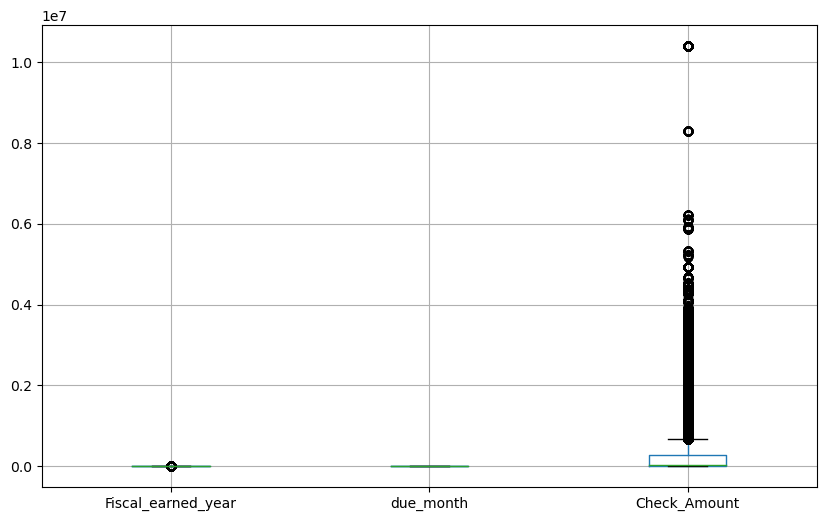

In [6]:
#1. Check for missing values
print(dataset.isnull().sum())

print("")

#2. Check data types
print(dataset.dtypes)

print("")

#3. Summary statistics
print(dataset.describe())

print("")

# Visualize outliers with boxplots or histograms
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dataset.boxplot()
plt.show()


Based on this boxplot, the Check_Amount requires transformation as there is significant variance. 

In [7]:
dataset['Contract_freq'].value_counts()

Monthly         350068
Quarterly        72700
Annual             339
As Submitted         9
Name: Contract_freq, dtype: int64

In [8]:
dataset['Contract_freq'].unique()

array(['Monthly', 'Quarterly', 'Annual', nan, 'As Submitted'],
      dtype=object)

In [9]:
#The 29 missing values will be repalced with 'As Submitted'
dataset['Contract_freq'].fillna('As Submitted', inplace=True)
dataset.isnull().sum()

Contract_freq         0
Fiscal_earned_year    0
due_month             0
Check_Amount          0
Market_category       0
dtype: int64

In [10]:
dataset['Contract_freq'].value_counts()

Monthly         350068
Quarterly        72700
Annual             339
As Submitted        38
Name: Contract_freq, dtype: int64

In [11]:
#2. Check for datatypes
dataset.dtypes

Contract_freq          object
Fiscal_earned_year      int64
due_month               int64
Check_Amount          float64
Market_category        object
dtype: object

In [12]:
dataset['Contract_freq'].value_counts()

Monthly         350068
Quarterly        72700
Annual             339
As Submitted        38
Name: Contract_freq, dtype: int64

In [13]:
dataset.head()

,Contract_freq,Fiscal_earned_year,due_month,Check_Amount,Market_category
0,Monthly,2003,4,543310.00,Facilities and Material
1,Monthly,2003,4,229343.21,Facilities and Material
2,Monthly,2003,4,201440.18,Facilities and Material
3,Monthly,2003,4,272868.54,Facilities and Material
4,Monthly,2003,4,239092.78,Facilities and Material


In [14]:
#dataset = dataset.groupby(['Fiscal_earned_year', 'due_month'])['Check_Amount'].sum().reset_index()

In [15]:
#dataset.head()

In [16]:
# Transform categorical features
#1. Market Category does not have any order and only requires labeling. Therefore use One-Hot Encoding

dataset = pd.get_dummies(dataset, columns=['Market_category'])

In [17]:
dataset.head()

,Contract_freq,Fiscal_earned_year,due_month,Check_Amount,Market_category_Facilities and Material,Market_category_Food,Market_category_Pharmaceuticals,Market_category_Services
0,Monthly,2003,4,543310.00,1,0,0,0
1,Monthly,2003,4,229343.21,1,0,0,0
2,Monthly,2003,4,201440.18,1,0,0,0
3,Monthly,2003,4,272868.54,1,0,0,0
4,Monthly,2003,4,239092.78,1,0,0,0


In [18]:
#2. Transform Contract_freq. Since there is some inherent order, I would like to maintain it. Therefore I will use label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Contract_freq_encoded'] = label_encoder.fit_transform(dataset['Contract_freq'])


In [19]:
dataset.head()

,Contract_freq,Fiscal_earned_year,due_month,Check_Amount,Market_category_Facilities and Material,Market_category_Food,Market_category_Pharmaceuticals,Market_category_Services,Contract_freq_encoded
0,Monthly,2003,4,543310.00,1,0,0,0,2
1,Monthly,2003,4,229343.21,1,0,0,0,2
2,Monthly,2003,4,201440.18,1,0,0,0,2
3,Monthly,2003,4,272868.54,1,0,0,0,2
4,Monthly,2003,4,239092.78,1,0,0,0,2


In [20]:
#Since I no longer need the Cntract_freq column, I will drop it

dataset.drop('Contract_freq', axis=1, inplace=True)


**Dealing with the month feature.**


This column is an important feature for the prediction. It should be treated as a sequential feature, and therefore the sequence need to be maintained.
Therefore I will use feature engineering technique that capture cyclical patterns, using sine-cosine transformation

In [21]:
# Transforming months using sine and cosine
dataset['sin_month'] = np.sin(2 * np.pi * dataset['due_month'] / 12)
dataset['cos_month'] = np.cos(2 * np.pi * dataset['due_month'] / 12)

In [22]:
dataset.head()

,Fiscal_earned_year,due_month,Check_Amount,Market_category_Facilities and Material,Market_category_Food,Market_category_Pharmaceuticals,Market_category_Services,Contract_freq_encoded,sin_month,cos_month
0,2003,4,543310.00,1,0,0,0,2,0.866025,-0.5
1,2003,4,229343.21,1,0,0,0,2,0.866025,-0.5
2,2003,4,201440.18,1,0,0,0,2,0.866025,-0.5
3,2003,4,272868.54,1,0,0,0,2,0.866025,-0.5
4,2003,4,239092.78,1,0,0,0,2,0.866025,-0.5


### Training and Test data development

The standard deviations of the feature 'Check_Amount' is quite disparate, which has a considerably larger standard deviation compared to the other numerical columns. This was shown above when I looked at the summary statistics above. 


In the following steps, the data will be split into training and test, apply the standardScaler, fit and transform.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop(columns=['Check_Amount'])
y = dataset['Check_Amount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)


In [24]:
#Save the model-ready dataset
dataset.to_csv('modelready_dataset.csv', index=False)


In [25]:
dataset.head()

,Fiscal_earned_year,due_month,Check_Amount,Market_category_Facilities and Material,Market_category_Food,Market_category_Pharmaceuticals,Market_category_Services,Contract_freq_encoded,sin_month,cos_month
0,2003,4,543310.00,1,0,0,0,2,0.866025,-0.5
1,2003,4,229343.21,1,0,0,0,2,0.866025,-0.5
2,2003,4,201440.18,1,0,0,0,2,0.866025,-0.5
3,2003,4,272868.54,1,0,0,0,2,0.866025,-0.5
4,2003,4,239092.78,1,0,0,0,2,0.866025,-0.5
